# Micro-Credit Defaulter Model

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Data_file.csv",index_col=0,parse_dates=['pdate'])
df.head(10)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [5]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
#let's dive into depth 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 209593 non-null  int64         
 1   msisdn                209593 non-null  object        
 2   aon                   209593 non-null  float64       
 3   daily_decr30          209593 non-null  float64       
 4   daily_decr90          209593 non-null  float64       
 5   rental30              209593 non-null  float64       
 6   rental90              209593 non-null  float64       
 7   last_rech_date_ma     209593 non-null  float64       
 8   last_rech_date_da     209593 non-null  float64       
 9   last_rech_amt_ma      209593 non-null  int64         
 10  cnt_ma_rech30         209593 non-null  int64         
 11  fr_ma_rech30          209593 non-null  float64       
 12  sumamnt_ma_rech30     209593 non-null  float64       
 13 

In [7]:
# let's check null values 
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
print("shape of data set is ",df.shape)

shape of data set is  (209593, 36)


# Data Preprocessing

# 1. Remove columns where number of unique value is only 1.
Let's look at no of unique values for each column.We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis

In [9]:
unique = df.nunique()
unique = unique[unique.values == 1]

In [10]:
df.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",df.shape ,"rows & columns.")

So now we are left with (209593, 35) rows & columns.


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


In [12]:

#Here we check the summary of object and datetime columns
df.describe(include=['object','datetime']).transpose()

,count,unique,top,freq,first,last
msisdn,209593,186243,04581I85330,7,NaT,NaT
pdate,209593,82,2016-07-04 00:00:00,3150,2016-06-01,2016-08-21


# Observation:

Summary statistics shows all the statistics of our dataset i.e. mean, median and other calculation.

Mean is greater than median in all the columns so aur data is right skewed.

The difference between 75% and maximum is higher that's why outliers are removed which needs to be removed.

The pdate column tells the date when the data is collect. It contains only three month data.

msidn is a mobile number of user and mobile number is unique for every customers. There are only 186243 unique number out of 209593 so rest of the data is duplicates entry so we have to remove those entry.

In [13]:
df1=df.copy()

In [14]:
#Deleting the duplicates entry in msidn column
df = df.drop_duplicates(subset = 'msisdn',keep='first')
df.shape

(186243, 35)

# Data Exploration

In [17]:
#Printing the object datatypes and their unique values.

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))

msisdn : ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']


Observation:

contains only one circle area data. So it have not any impact in our model if we drop this feature.

In [18]:
#Printing the float datatype columns and number of unique values in the particular columns.

for column in df.columns:
    if df[column].dtype==np.number:
        print(str(column) + ' : ' + str(df[column].nunique()))
        print(df[column].nunique())

aon : 4282
4282
daily_decr30 : 130323
130323
daily_decr90 : 139842
139842
rental30 : 117881
117881
rental90 : 125595
125595
last_rech_date_ma : 1061
1061
last_rech_date_da : 1061
1061
fr_ma_rech30 : 961
961
sumamnt_ma_rech30 : 13130
13130
medianamnt_ma_rech30 : 501
501
medianmarechprebal30 : 28486
28486
medianamnt_ma_rech90 : 602
602
medianmarechprebal90 : 28064
28064
cnt_da_rech30 : 949
949
fr_da_rech30 : 960
960
maxamnt_loans30 : 924
924
medianamnt_loans30 : 6
6
cnt_loans90 : 968
968
medianamnt_loans90 : 6
6
payback30 : 1249
1249
payback90 : 2128
2128


In [19]:
#Checking the number of number of defaulter and non defaulter customers.
df['label'].value_counts()

1    160383
0     25860
Name: label, dtype: int64

In [20]:
#Checking the defaulter customers percentage wise.
df['label'].value_counts(normalize=True) *100

1    86.114914
0    13.885086
Name: label, dtype: float64

# Observation:

After seeing the label column which is also our target feature for this dataset it is clearly shown that 86.11% of
data is label 1 and only 13.8% of data is label 0 so our dataset is implanced. So before making the ML model first we have to do sampling to get rid off imblance dataset.

In [21]:
#check cor-relation
df_cor = df.corr()
df_cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.004035,0.174901,0.173016,0.057207,0.075869,0.004113,0.001814,0.139969,0.244728,...,0.197565,0.199916,-0.000274,0.050067,0.004305,0.205065,0.086033,0.041265,0.050892,0.053776
aon,-0.004035,1.000000,0.000630,0.000052,-0.002930,-0.002618,0.001853,-0.001796,0.004102,-0.004315,...,-0.003157,-0.003302,-0.003096,0.004679,0.000192,-0.003336,-0.000975,0.002346,0.002246,0.002549
daily_decr30,0.174901,0.000630,1.000000,0.977659,0.427503,0.444932,-0.000171,-0.001311,0.287181,0.444365,...,0.346504,0.454169,0.001569,-0.005629,0.008865,0.542179,0.396803,-0.031485,0.033669,0.056822
daily_decr90,0.173016,0.000052,0.977659,1.000000,0.420561,0.457443,0.000058,-0.001484,0.275195,0.419650,...,0.321006,0.430940,0.001283,0.000012,0.009220,0.544854,0.394487,-0.029046,0.025432,0.050147
rental30,0.057207,-0.002930,0.427503,0.420561,1.000000,0.955233,-0.000949,0.003294,0.128773,0.220472,...,0.162833,0.217586,-0.001525,-0.013746,0.003026,0.280233,0.225449,-0.032555,0.075530,0.099533
rental90,0.075869,-0.002618,0.444932,0.457443,0.955233,1.000000,-0.001758,0.002643,0.123436,0.218618,...,0.154900,0.216641,-0.002189,-0.006703,0.004301,0.307920,0.241772,-0.031045,0.069847,0.104731
last_rech_date_ma,0.004113,0.001853,-0.000171,0.000058,-0.000949,-0.001758,1.000000,0.002629,-0.000754,0.006491,...,0.002308,0.001031,0.001681,0.002430,-0.000216,0.000664,-0.003097,0.003261,-0.002857,-0.001787
last_rech_date_da,0.001814,-0.001796,-0.001311,-0.001484,0.003294,0.002643,0.002629,1.000000,-0.000699,0.002690,...,0.001722,0.001443,0.001135,0.000009,-0.002355,0.001179,0.002294,-0.002258,-0.000020,0.000699
last_rech_amt_ma,0.139969,0.004102,0.287181,0.275195,0.128773,0.123436,-0.000754,-0.000699,1.000000,0.008012,...,-0.019892,0.017706,0.000558,0.029945,0.000444,0.024067,0.148656,0.022939,-0.026037,-0.013236
cnt_ma_rech30,0.244728,-0.004315,0.444365,0.419650,0.220472,0.218618,0.006491,0.002690,0.008012,1.000000,...,0.733577,0.723759,-0.001186,-0.058580,0.012307,0.658939,0.180305,-0.063378,0.057166,0.031696


Observation:

daily_decr30 and daily_decr90 features are highly correlated with each other.

rental30 and rental90 features are highly correlated with each other.

cnt_loans30 and amount_loans30 columns are highly correlated with each other.

amount_loans30 is also highly correlated with amount_loans90 column.

medianamnt_loans30 and medianamnt_loans90 is highly correlated with each other.

We have to drop one of the features which are highly correlated with other feayures. And if we dont do this then our model will face multicolinearity problem.

In [23]:
#Dropping the columns which is highly correlated with each other do avoid multicolinearity problem.
df.drop(columns=['daily_decr30','rental30','amnt_loans30','medianamnt_loans30'],axis=1, inplace = True)

In [24]:
#Now checking the shape
print(df.shape)
#Checking the unique value in pdate column.
df['pdate'].nunique()

(186243, 31)


82

In [25]:
#Making the new column Day, Month and year from pdate column
df['pDay']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.day
df['pMonth']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.month
df['pYear']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.year

In [26]:
df.head()

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,pDay,pMonth,pYear
1,0,21408I70789,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
2,1,76462I70374,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
3,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
4,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
5,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016


In [27]:
#Checking the number of months 
df['pMonth'].unique()

array([7, 8, 6], dtype=int64)

In [28]:
#After fetching the data from pdate column now we are going to drop it because it has not any significant role.
df.drop(columns=['pdate'],axis=1, inplace = True)

In [29]:
#Seprate the categorical columns and Numerical columns
cat_df,num_df=[],[]

for i in df.columns:
    if df[i].dtype==object:
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_df))
print('>>> Number of Numerical Feature::', len(num_df))

>>> Total Number of Feature:: 33
>>> Number of categorical features:: 1
>>> Number of Numerical Feature:: 32


# Data Visualization

Text(0.5, 1.0, 'Correlation with target Variable that is label column')

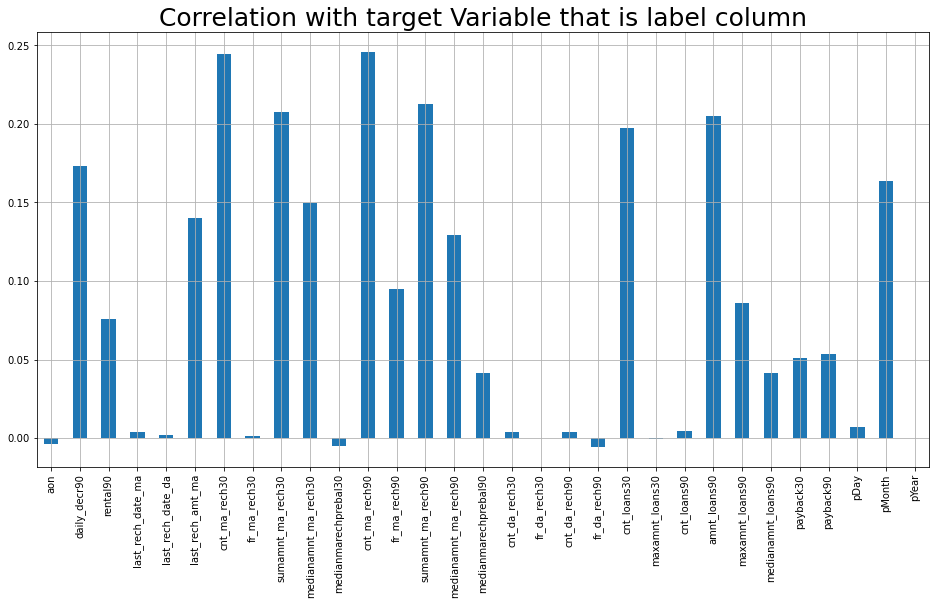

In [30]:
#Checking the correlation with target variable
plt.figure(figsize=(16,8))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=25)

Observation:

Here we see the correlation of the columns with respect to the target column that is label.

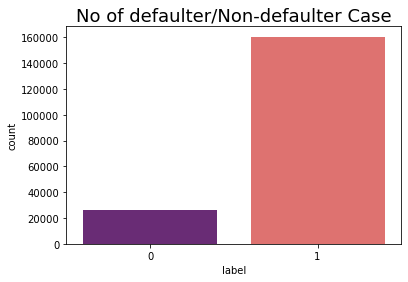

1    160383
0     25860
Name: label, dtype: int64


In [31]:
#Checking the number of Fraud cases.
sns.countplot(x='label', data=df, palette='magma')
plt.title('No of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

print(df['label'].value_counts())

Observation:

Label 1 indicates loan has been payed i.e Non-Defaulter and label 0 indicates indicates that the loan has not beenpayed i.e. defaulter.

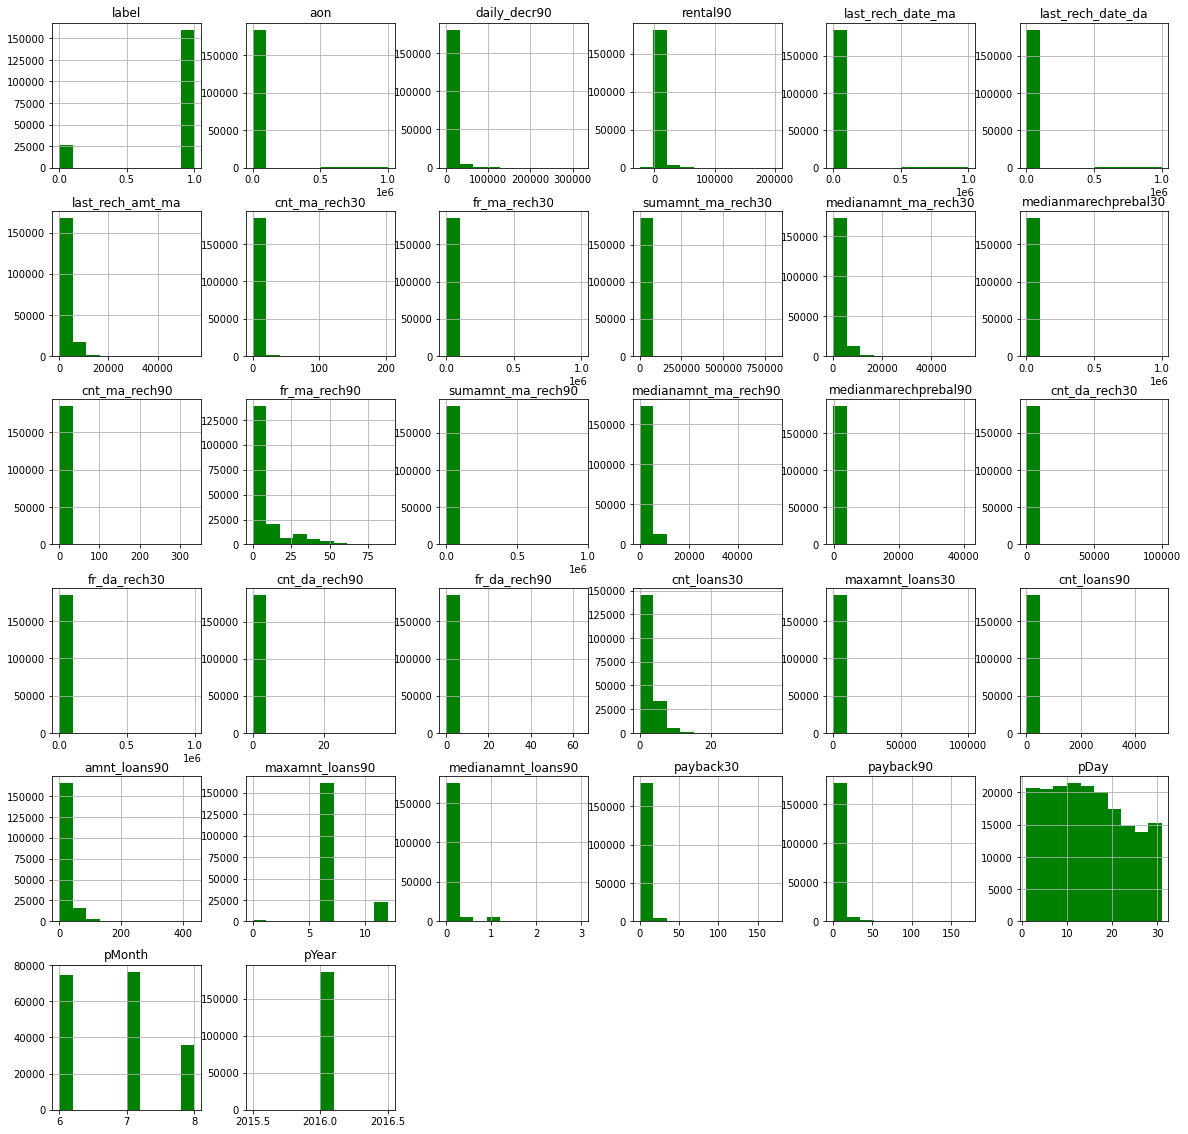

In [32]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='green')
plt.show()

Observation:

We plot the histogram to display the shape and spread of continuous sample data.In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range

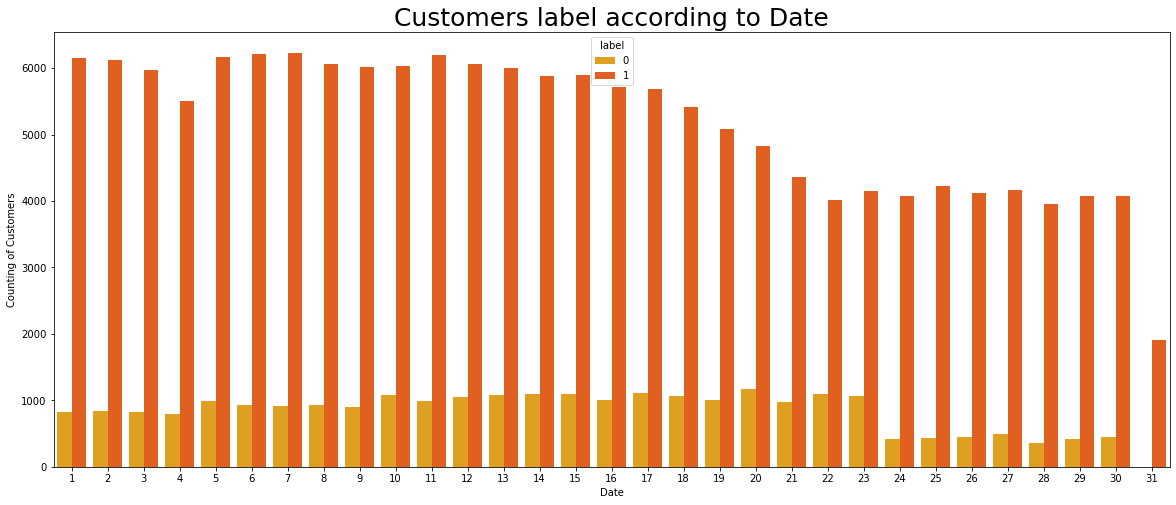

In [33]:
#Customer label according to Date
plt.figure(figsize=(20,8))
sns.countplot(x="pDay", hue='label', data=df, palette='autumn_r')
plt.title("Customers label according to Date", fontsize=25)
plt.xlabel('Date')
plt.ylabel('Counting of Customers')
plt.show()

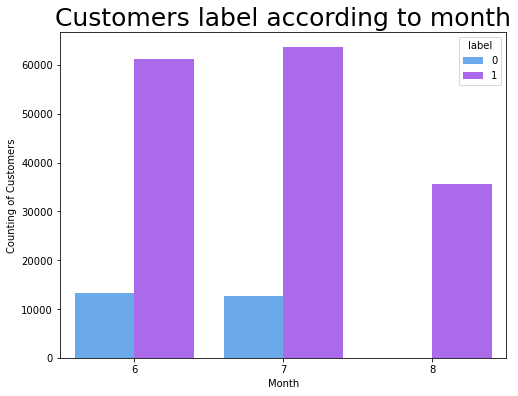

In [34]:
#Customer label according to Month
plt.figure(figsize=(8,6))
sns.countplot(x="pMonth", hue='label', data=df, palette='cool')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()

Observation:

The first figure which is date vs label shows that the customers who did not pay their loans are from date 10 to 23.

There are severals customers at June and July month who did not pay their loan.

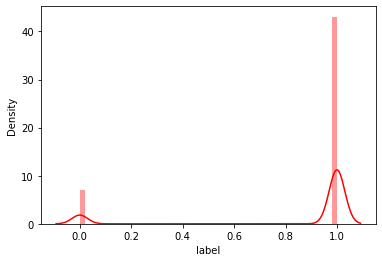

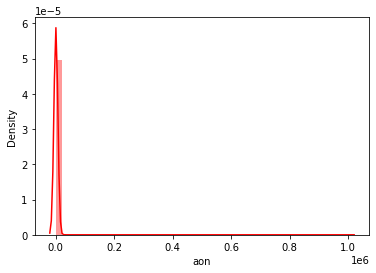

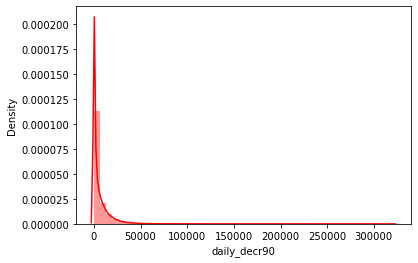

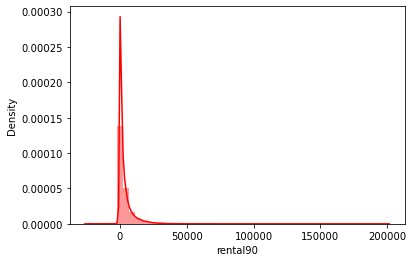

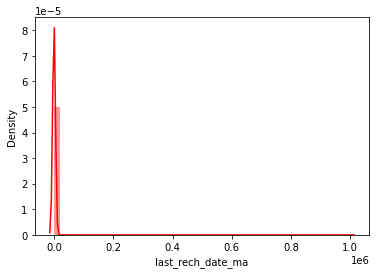

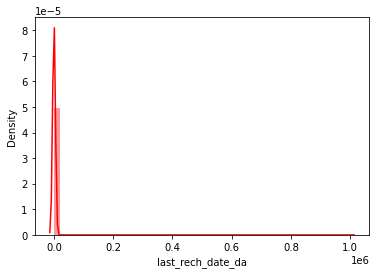

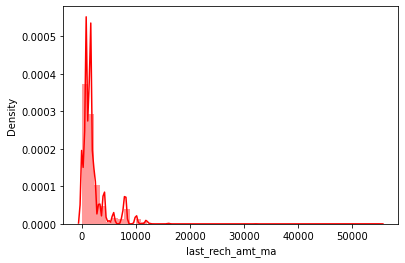

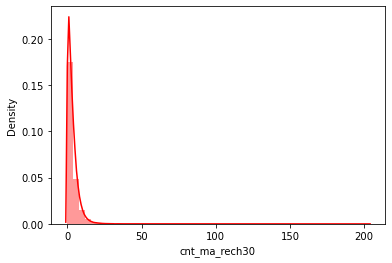

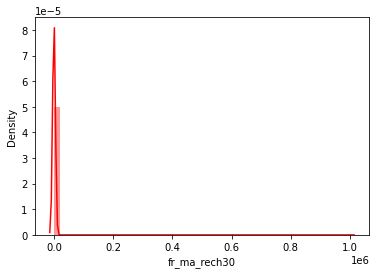

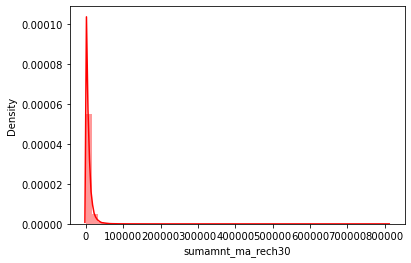

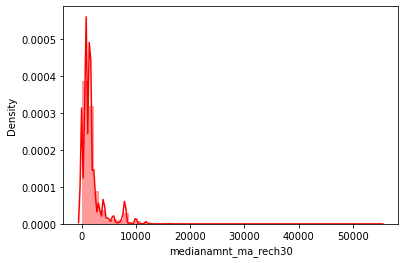

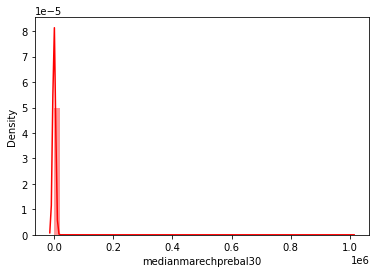

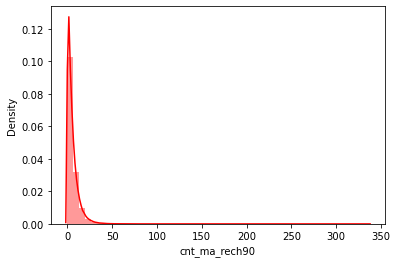

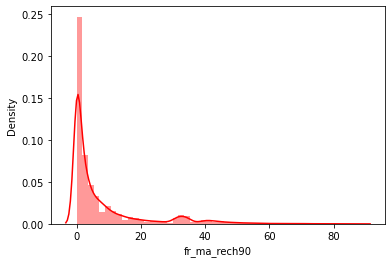

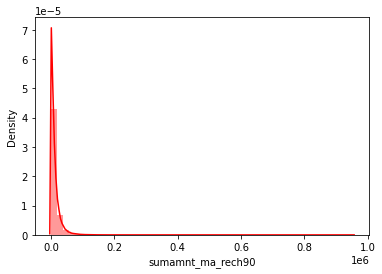

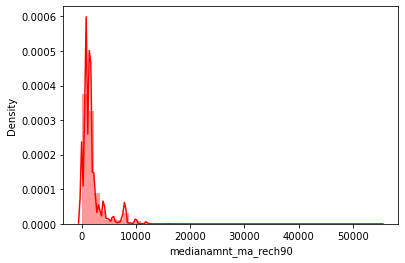

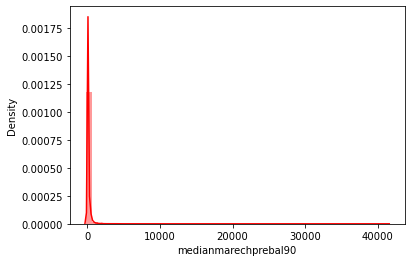

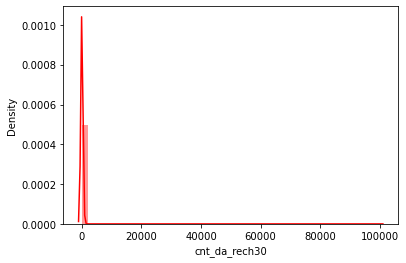

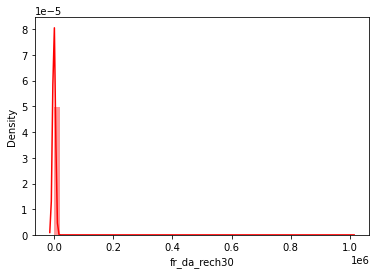

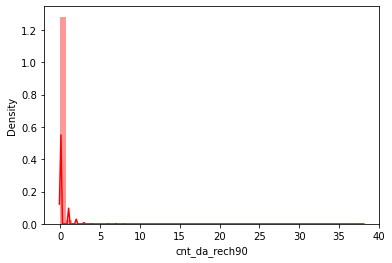

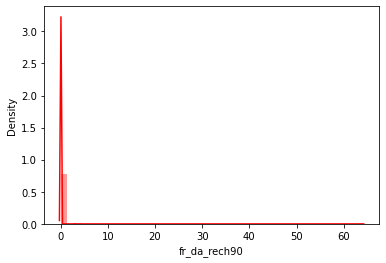

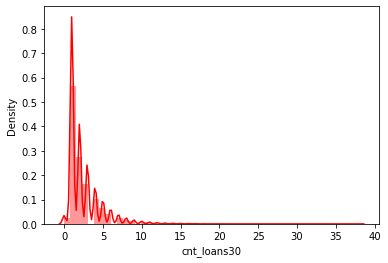

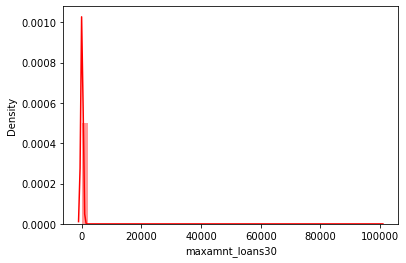

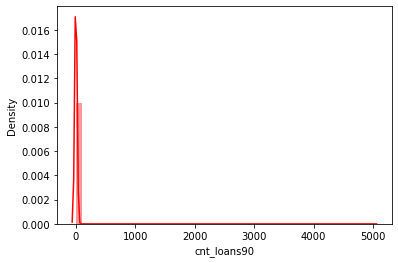

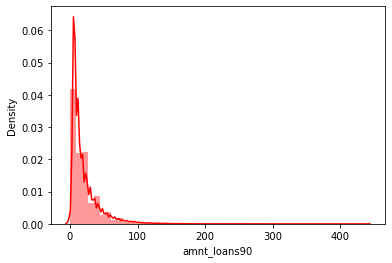

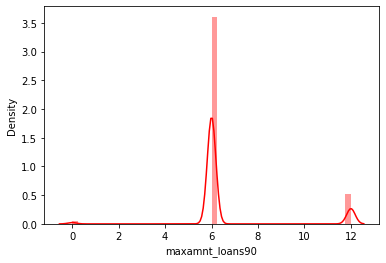

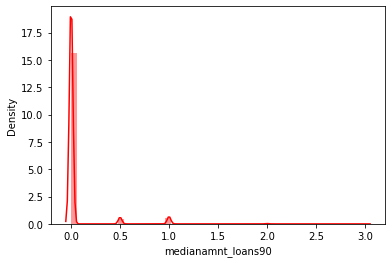

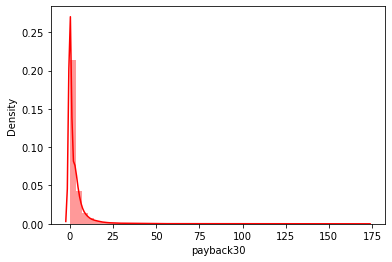

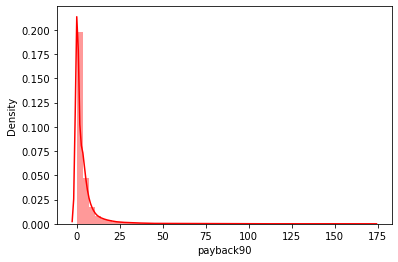

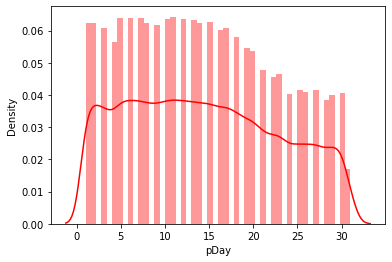

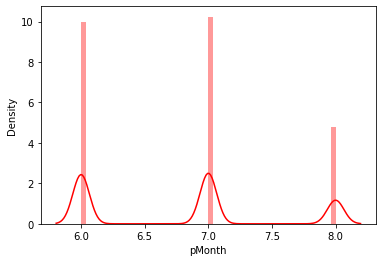

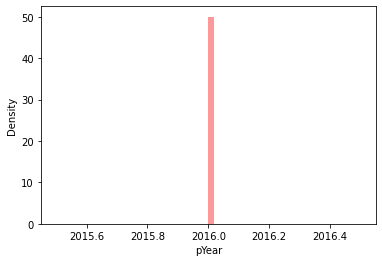

In [35]:
#checking skewness

for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [36]:
df.skew()

label                   -2.088847
aon                     10.365026
daily_decr90             4.301490
rental90                 4.530925
last_rech_date_ma       14.852116
last_rech_date_da       14.781824
last_rech_amt_ma         3.830612
cnt_ma_rech30            3.471313
fr_ma_rech30            14.822224
sumamnt_ma_rech30        7.134012
medianamnt_ma_rech30     3.519213
medianmarechprebal30    14.677544
cnt_ma_rech90            3.558616
fr_ma_rech90             2.250443
sumamnt_ma_rech90        5.231693
medianamnt_ma_rech90     3.753115
medianmarechprebal90    43.576364
cnt_da_rech30           17.749485
fr_da_rech30            14.728609
cnt_da_rech90           28.396293
fr_da_rech90            28.959851
cnt_loans30              2.737584
maxamnt_loans30         17.718074
cnt_loans90             16.717192
amnt_loans90             3.165962
maxamnt_loans90          1.650198
medianamnt_loans90       4.774958
payback30                8.193009
payback90                6.763241
pDay          

<AxesSubplot:xlabel='label', ylabel='fr_da_rech30'>

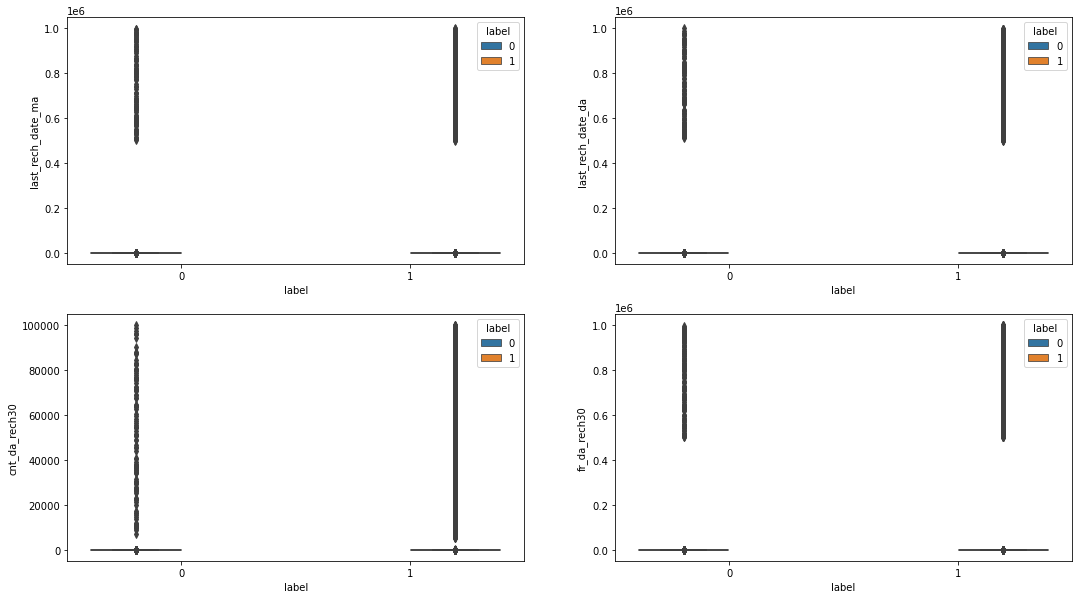

In [37]:
#plotting outliers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'label', y = 'last_rech_date_ma', hue = 'label', data = df)
sns.boxplot(ax=ax2, x = 'label', y = 'last_rech_date_da', hue = 'label', data = df)
sns.boxplot(ax=ax3, x = 'label', y = 'cnt_da_rech30', hue = 'label', data = df)
sns.boxplot(ax=ax4, x = 'label', y = 'fr_da_rech30', hue = 'label', data = df)

Observation:

There are too many outliers present in our dataset.So we need to remove it. But before removing please check that only 8 to 10% of data removed.

In [38]:
#Creating a copy of our dataset
df2=df1.copy()
#Dropping the object columns
df1.drop(columns=['msisdn','pdate'],axis=1,inplace=True)

In [39]:
df1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
1,2.647896,0.103577,0.252299,0.276346,0.573844,0.558583,0.069637,0.069550,0.221637,0.464760,...,0.297116,0.342470,0.063284,0.247794,0.073493,0.439950,0.334212,0.229594,2.904700,2.394093
2,0.377658,0.097764,0.731037,0.553380,0.231788,0.036020,0.069303,0.069550,1.570178,0.699718,...,0.688582,0.342470,0.061871,0.247794,0.077941,0.439950,2.517690,0.229594,0.385630,0.419233
3,0.377658,0.100102,0.432011,0.429033,0.416020,0.447674,0.069619,0.069550,0.221637,0.699718,...,0.688582,0.687700,0.063284,0.247794,0.077941,0.666624,0.334212,0.229594,0.385630,0.419233
4,0.377658,0.103986,0.581326,0.555125,0.587935,0.576036,0.068914,0.069550,0.471344,0.934677,...,0.297116,0.342470,0.063284,0.247794,0.073493,0.439950,0.334212,0.229594,0.385630,0.419233
5,0.377658,0.094660,0.567293,0.543274,0.369886,0.413227,0.069600,0.069550,0.103151,0.710030,...,1.660218,1.383682,0.063284,0.247794,0.051250,0.693417,0.334212,0.229594,0.120890,0.192873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,0.377658,0.101833,0.567157,0.543159,0.372140,0.414910,0.069656,0.069550,0.836664,0.229802,...,0.297116,0.342470,0.063284,0.247794,0.073493,0.439950,0.334212,0.229594,0.272170,0.322221
209590,0.377658,0.092969,0.579622,0.553686,0.223791,0.304144,0.069600,0.069550,0.544737,0.005156,...,0.094351,0.002761,0.063284,0.247794,0.069044,0.213277,0.334212,0.229594,0.272170,0.322221
209591,0.377658,0.093788,0.700790,0.533194,0.735567,0.937500,0.069619,0.069550,0.221637,0.240114,...,0.485818,1.383682,0.061871,0.247794,0.055699,1.146764,2.517690,0.229594,0.068209,0.047356
209592,0.377658,0.084289,0.770755,0.594558,0.529352,0.433039,0.069637,0.068838,0.544737,0.240114,...,0.297116,0.002761,0.061871,0.247794,0.069044,0.013396,2.517690,0.229594,0.385630,0.599385


In [41]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [42]:
df1_new=df1[(z<3).all(axis=1)]

In [43]:
#Checking the shape
print(df1.shape,'\t\t',df1_new.shape)

(209593, 33) 		 (161465, 33)


In [44]:
#Converting the categorical data into numeric variables
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [45]:
df.head()

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pDay,pMonth,pYear
1,0,40191,272.0,3065.150000,260.13,2.0,0.0,14,2,21.0,...,6.0,2.0,2,1,0.0,29.000000,29.000000,19,1,0
2,1,142291,712.0,12124.750000,3691.26,20.0,0.0,38,1,0.0,...,12.0,1.0,2,2,0.0,0.000000,0.000000,9,2,0
3,1,33594,535.0,1398.000000,900.13,3.0,0.0,14,1,0.0,...,6.0,1.0,1,1,0.0,0.000000,0.000000,18,2,0
4,1,104157,241.0,21.228000,159.42,41.0,0.0,10,0,0.0,...,6.0,2.0,2,1,0.0,0.000000,0.000000,5,0,0
5,1,6910,947.0,150.619333,1098.90,4.0,0.0,23,7,2.0,...,6.0,7.0,7,1,0.0,2.333333,2.333333,21,0,0


In [46]:
#feature importance

#Splitting the data into x and y
x = df.drop(['label'], axis=1)

y = df['label']

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x, y)

DecisionTreeClassifier(max_depth=3)

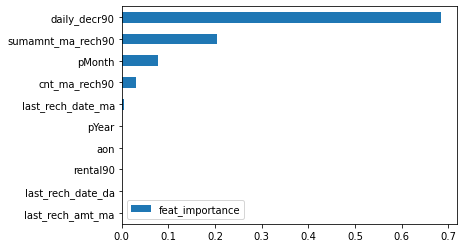

In [48]:
dt_features = pd.DataFrame(dt.feature_importances_, index=x.columns, columns=['feat_importance'])
dt_features.sort_values('feat_importance').tail(10).plot.barh()
plt.show()

By looking at the daily_decr90 which is Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah), it seems that this feature helps to discriminate the data indeed. This feature can bring insights for company when analyzing a customers.

# Model Training

In [49]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [50]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [52]:
KNN=KNeighborsClassifier(n_neighbors=10)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=20)
GNB=GaussianNB()
RF=RandomForestClassifier()

In [53]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RF))

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

**************************** KNeighborsClassifier ********************************


KNeighborsClassifier(n_neighbors=10)


Accuracy score =  0.8699025477194019


Cross_val_Score =  0.8713937870453654


roc_auc_score =  0.6867161965572931


classification_report
               precision    recall  f1-score   support

           0       0.54      0.43      0.48      5172
           1       0.91      0.94      0.93     32077

    accuracy                           0.87     37249
   macro avg       0.73      0.69      0.70     37249
weighted avg       0.86      0.87      0.86     37249



[[ 2240  2932]
 [ 1914 30163]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** LogisticRegression ********************************


LogisticRegression()


Accuracy score =  0.8642379661198958


Cross_val_Score =  0.8642364984778247


roc_auc_score =  0.5250645042510697


classification_report
               precision    recall  f1-score   support

           0       0.63    

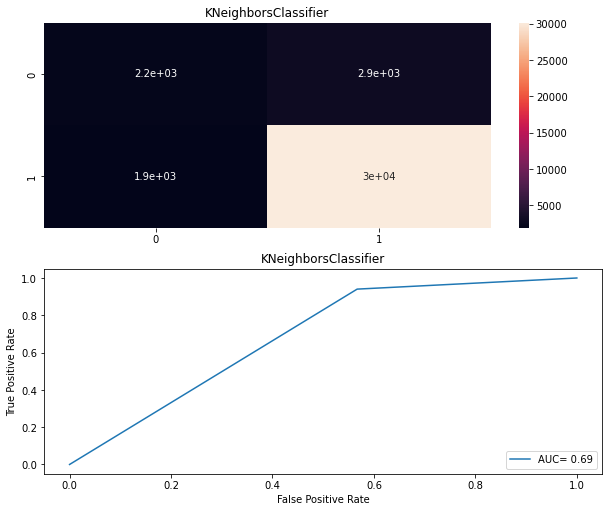

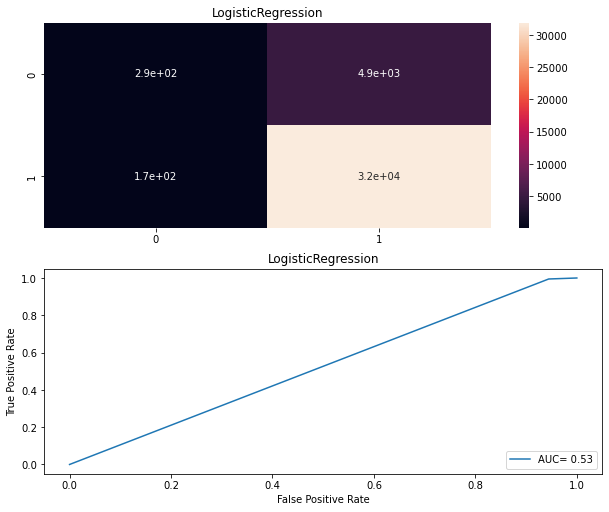

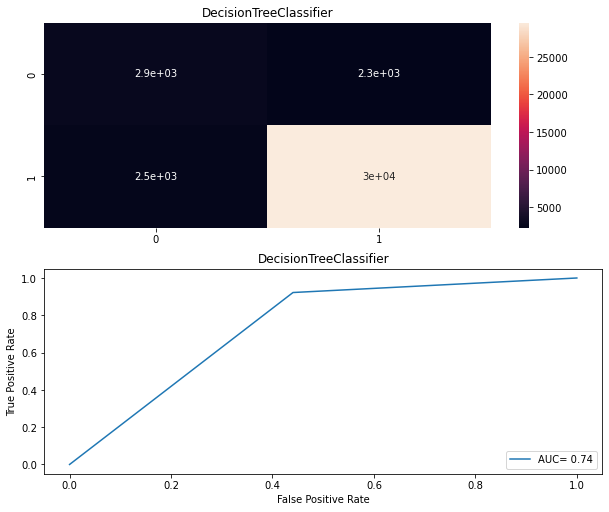

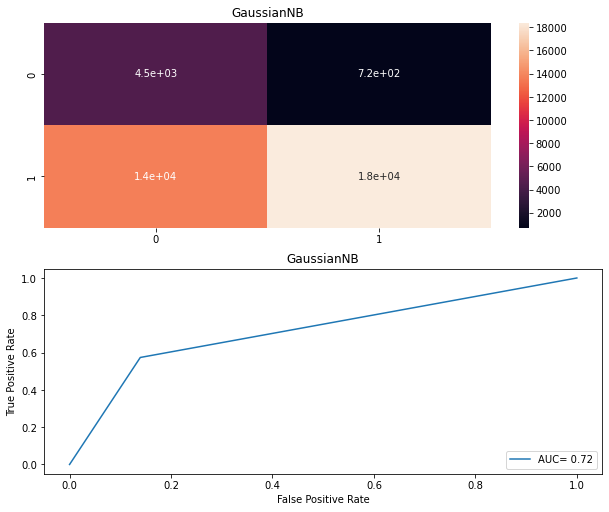

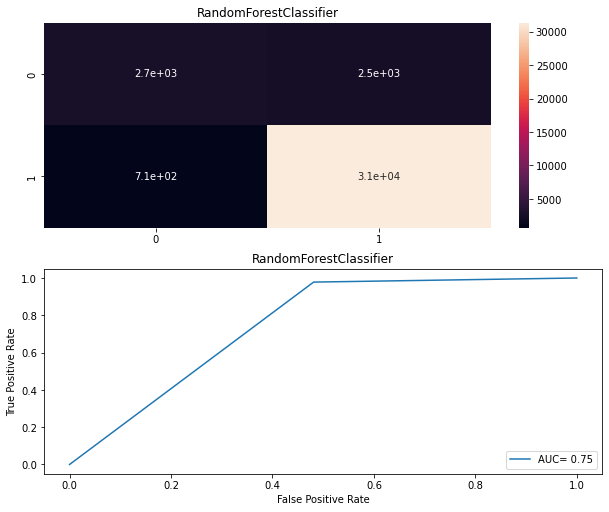

In [55]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('****************************',name,'********************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train.values.ravel())
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score = ', AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_Score = ', sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label = 'AUC= %0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [56]:
result=pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'Cross_val_score':cvs, 'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,86.990255,87.139379,68.671620
1,LogisticRegression,86.423797,86.423650,52.506450
2,DecisionTreeClassifier,87.175495,87.465835,74.082257
3,GaussianNB,61.362721,60.837705,71.720115
4,RandomForestClassifier,91.425273,91.345178,74.846932


# Conclusion:
    
From our above analysis we understand that which factors are responsible and using which a Microfinance Institution (MFI) can predict that a customer can be a defaulter or not a defaulter basis on which Microfinance Institution (MFI) can give a short term loan and predictions that could help them in further investment and improvement in selection of customers.